**Linear Regression**

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([5.1, 7.2, 8.9, 11.1, 12.8]).reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)

y_pred = reg.predict(X)
print(y_pred)

[[1.93]]
[3.23]
[[ 5.16]
 [ 7.09]
 [ 9.02]
 [10.95]
 [12.88]]


**Logistic Regression**

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
X = np.array([1, 2, 3, 4, 5, 7]).reshape(-1, 1)
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,)
clf = LogisticRegression().fit(X, y)
y_pred = clf.predict(X)
y_pred_proba = clf.predict_proba(X)
print(y_pred)
print(y_pred_proba[:,1])

[0 0 0 1 1 1]
[0.05915596 0.15714628 0.35603106 0.62113094 0.82939351 0.97714137]


**Decision Tree**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

data = {'age': [23, 31, 35, 35, 42, 43, 45, 46, 46, 51], 
        'likes goats': ['no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes'], 
        'likes height': ['no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes'], 
        'go rock climbing': ['no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes']}

df = pd.DataFrame(data)
df

,age,likes goats,likes height,go rock climbing
0,23,no,no,no
1,31,yes,yes,yes
2,35,no,yes,yes
3,35,no,no,no
4,42,no,no,no
5,43,yes,yes,yes
6,45,yes,no,no
7,46,yes,yes,yes
8,46,no,yes,no
9,51,yes,yes,yes


In [4]:
# transfor data
df.loc[df['likes goats']=='no', 'likes goats'] = 0
df.loc[df['likes goats']=='yes', 'likes goats'] = 1
df.loc[df['likes height']=='no', 'likes height'] = 0
df.loc[df['likes height']=='yes', 'likes height'] = 1
df.loc[df['go rock climbing']=='no', 'go rock climbing'] = 0
df.loc[df['go rock climbing']=='yes', 'go rock climbing'] = 1
df[['likes goats', 'likes height', 'go rock climbing']] = df[['likes goats', 'likes height', 'go rock climbing']].astype(int)
df

,age,likes goats,likes height,go rock climbing
0,23,0,0,0
1,31,1,1,1
2,35,0,1,1
3,35,0,0,0
4,42,0,0,0
5,43,1,1,1
6,45,1,0,0
7,46,1,1,1
8,46,0,1,0
9,51,1,1,1


In [5]:
X = df[['age', 'likes goats', 'likes height']].values
y = df[['go rock climbing']].values.reshape(-1,)

In [6]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)
print(f'Predictions: {clf.predict(X)}')
print(f'Predicted Probabilites{clf.predict_proba(X)}')

Predictions: [0 1 1 0 0 1 0 1 0 1]
Predicted Probabilites[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


[Text(0.4, 0.875, 'likes height <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.625, 'likes goats <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.4, 0.375, 'age <= 40.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

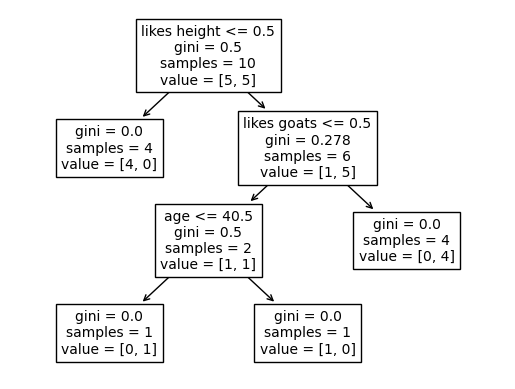

In [7]:
plot_tree(clf, feature_names=['age', 'likes goats', 'likes height'], fontsize=10)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

data = {'age': [23, 31, 35, 35, 42, 43, 45, 46, 46, 51], 
        'likes goats': ['no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes'], 
        'likes height': ['no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes'], 
        'climbed meters': [200, 700, 600, 300, 200, 700, 300, 700, 600, 700]}

df = pd.DataFrame(data)
df

,age,likes goats,likes height,climbed meters
0,23,no,no,200
1,31,yes,yes,700
2,35,no,yes,600
3,35,no,no,300
4,42,no,no,200
5,43,yes,yes,700
6,45,yes,no,300
7,46,yes,yes,700
8,46,no,yes,600
9,51,yes,yes,700


In [9]:
# transfor data
df.loc[df['likes goats']=='no', 'likes goats'] = 0
df.loc[df['likes goats']=='yes', 'likes goats'] = 1
df.loc[df['likes height']=='no', 'likes height'] = 0
df.loc[df['likes height']=='yes', 'likes height'] = 1
df[['likes goats', 'likes height']] = df[['likes goats', 'likes height']].astype(int)
df

,age,likes goats,likes height,climbed meters
0,23,0,0,200
1,31,1,1,700
2,35,0,1,600
3,35,0,0,300
4,42,0,0,200
5,43,1,1,700
6,45,1,0,300
7,46,1,1,700
8,46,0,1,600
9,51,1,1,700


In [10]:
X = df[['age', 'likes goats', 'likes height']].values
y = df[['climbed meters']].values.reshape(-1,)

In [11]:
reg = DecisionTreeRegressor()
reg = reg.fit(X, y)
print(f'Predictions: {reg.predict(X)}')

Predictions: [200. 700. 600. 300. 200. 700. 300. 700. 600. 700.]


[Text(0.5555555555555556, 0.9, 'likes height <= 0.5\nsquared_error = 44000.0\nsamples = 10\nvalue = 500.0'),
 Text(0.3333333333333333, 0.7, 'likes goats <= 0.5\nsquared_error = 2500.0\nsamples = 4\nvalue = 250.0'),
 Text(0.2222222222222222, 0.5, 'age <= 29.0\nsquared_error = 2222.222\nsamples = 3\nvalue = 233.333'),
 Text(0.1111111111111111, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 200.0'),
 Text(0.3333333333333333, 0.3, 'age <= 38.5\nsquared_error = 2500.0\nsamples = 2\nvalue = 250.0'),
 Text(0.2222222222222222, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 300.0'),
 Text(0.4444444444444444, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 200.0'),
 Text(0.4444444444444444, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 300.0'),
 Text(0.7777777777777778, 0.7, 'likes goats <= 0.5\nsquared_error = 2222.222\nsamples = 6\nvalue = 666.667'),
 Text(0.6666666666666666, 0.5, 'squared_error = 0.0\nsamples = 2\nvalue = 600.0'),
 Text(0.8888888888888888, 0.5, 'squared_error = 0.0\nsampl

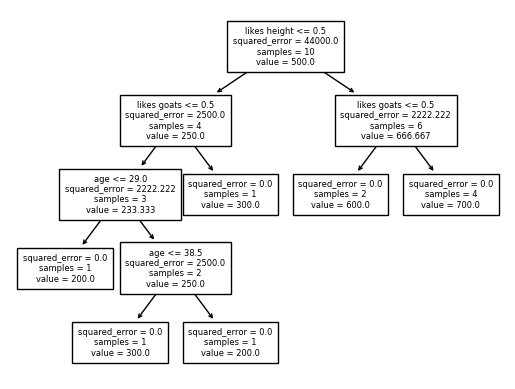

In [12]:
plot_tree(reg, feature_names=['age', 'likes goats', 'likes height'], fontsize=6)

In [13]:
from sklearn.metrics import mean_squared_error
a = df[df['age']<=46]['climbed meters'].values
print(a)
mean_a = np.repeat(np.mean(a), len(a))
print(mean_a)
mean_squared_error(a, mean_a)

[200 700 600 300 200 700 300 700 600]
[477.77777778 477.77777778 477.77777778 477.77777778 477.77777778
 477.77777778 477.77777778 477.77777778 477.77777778]


43950.61728395061

**Random Forest**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

data = {'age': [23, 31, 35, 35, 42, 43, 45, 46, 46, 51], 
        'likes goats': ['no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes'], 
        'likes height': ['no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes'], 
        'go rock climbing': ['no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes']}

df = pd.DataFrame(data)
df

,age,likes goats,likes height,go rock climbing
0,23,no,no,no
1,31,yes,yes,yes
2,35,no,yes,yes
3,35,no,no,no
4,42,no,no,no
5,43,yes,yes,yes
6,45,yes,no,no
7,46,yes,yes,yes
8,46,no,yes,no
9,51,yes,yes,yes


In [15]:
# transform data
df.loc[df['likes goats']=='no', 'likes goats'] = 0
df.loc[df['likes goats']=='yes', 'likes goats'] = 1
df.loc[df['likes height']=='no', 'likes height'] = 0
df.loc[df['likes height']=='yes', 'likes height'] = 1
df.loc[df['go rock climbing']=='no', 'go rock climbing'] = 0
df.loc[df['go rock climbing']=='yes', 'go rock climbing'] = 1
df[['likes goats', 'likes height', 'go rock climbing']] = df[['likes goats', 'likes height', 'go rock climbing']].astype(int)
df

,age,likes goats,likes height,go rock climbing
0,23,0,0,0
1,31,1,1,1
2,35,0,1,1
3,35,0,0,0
4,42,0,0,0
5,43,1,1,1
6,45,1,0,0
7,46,1,1,1
8,46,0,1,0
9,51,1,1,1


In [16]:
X = df[['age', 'likes goats', 'likes height']].values
y = df[['go rock climbing']].values.reshape(-1,)

In [17]:
clf = RandomForestClassifier(n_estimators=3, random_state=1)
clf.fit(X, y)
print(f'Predictions: {clf.predict(X)}')

Predictions: [1 1 1 1 0 1 1 1 0 1]


[Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.5\nsamples = 7\nvalue = [5, 5]'),
 Text(0.25, 0.5, 'x[0] <= 38.5\ngini = 0.444\nsamples = 3\nvalue = [4, 2]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [4, 0]'),
 Text(0.75, 0.5, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

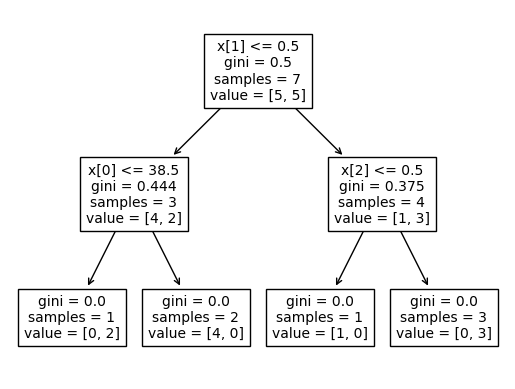

In [18]:
tree.plot_tree(clf.estimators_[0], fontsize=10)

[Text(0.6, 0.8333333333333334, 'x[0] <= 42.5\ngini = 0.48\nsamples = 7\nvalue = [6, 4]'),
 Text(0.4, 0.5, 'x[2] <= 0.5\ngini = 0.245\nsamples = 4\nvalue = [6, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [6, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

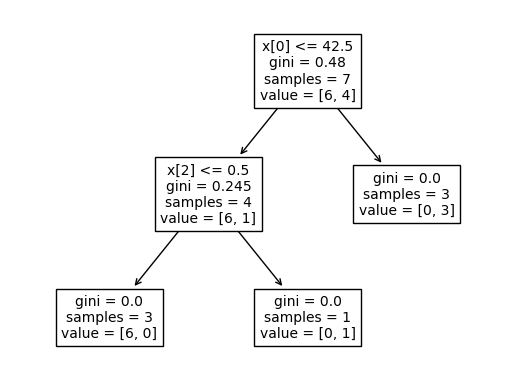

In [19]:
tree.plot_tree(clf.estimators_[1], fontsize=10)

[Text(0.6, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.42\nsamples = 5\nvalue = [3, 7]'),
 Text(0.4, 0.5, 'x[0] <= 38.5\ngini = 0.375\nsamples = 3\nvalue = [3, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 6]')]

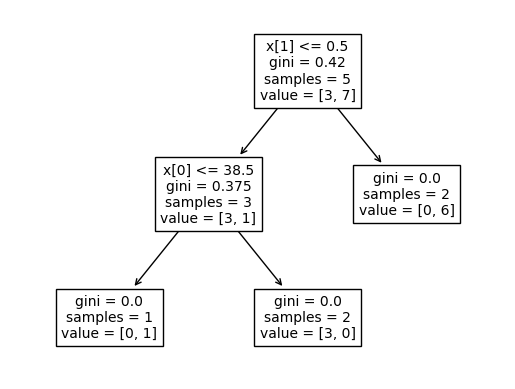

In [20]:
tree.plot_tree(clf.estimators_[2], fontsize=10)

In [21]:
print(f'Predictions: {clf.predict(X[:1])}')

Predictions: [1]


In [22]:
import sklearn.ensemble._forest as forest_utils

n_samples = len(y) # number of training samples

n_samples_bootstrap = forest_utils._get_n_samples_bootstrap(
    n_samples, clf.max_samples
)

unsampled_indices_trees = []
sampled_indices_trees = []

for estimator in clf.estimators_:
    unsampled_indices = forest_utils._generate_unsampled_indices(
        estimator.random_state, n_samples, n_samples_bootstrap)
    unsampled_indices_trees.append(unsampled_indices)

    sampled_indices = forest_utils._generate_sample_indices(
        estimator.random_state, n_samples, n_samples_bootstrap)
    sampled_indices_trees.append(sampled_indices)


In [23]:
unsampled_indices_trees

[array([0, 3, 5]), array([2, 6, 8]), array([0, 1, 3, 6, 7])]

In [24]:
samples = sampled_indices_trees
samples

[array([4, 7, 2, 9, 6, 1, 4, 4, 8, 2]),
 array([4, 9, 1, 5, 3, 4, 3, 4, 0, 7]),
 array([9, 2, 9, 9, 4, 8, 8, 5, 5, 9])]

In [25]:
X[samples[0]], y[samples[0]]

(array([[42,  0,  0],
        [46,  1,  1],
        [35,  0,  1],
        [51,  1,  1],
        [45,  1,  0],
        [31,  1,  1],
        [42,  0,  0],
        [42,  0,  0],
        [46,  0,  1],
        [35,  0,  1]]),
 array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1]))

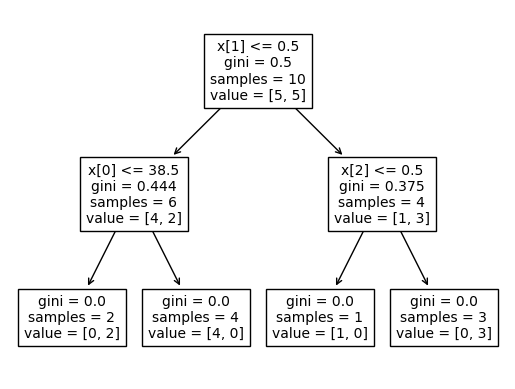

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(max_features="sqrt", random_state=10)
clf1.fit(X[samples[0],:], y[samples[0]])
tree.plot_tree(clf1, fontsize=10);

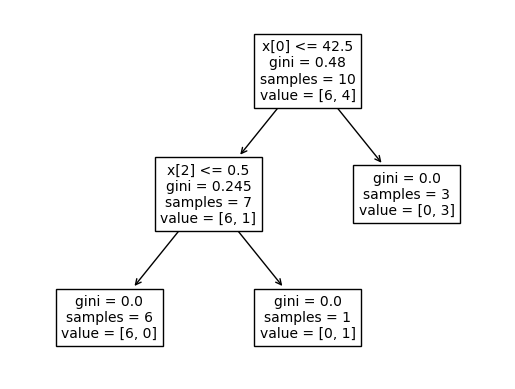

In [27]:
clf2 = DecisionTreeClassifier(max_features="sqrt", random_state=2)
clf2.fit(X[samples[1],:], y[samples[1]])
tree.plot_tree(clf2, fontsize=10);

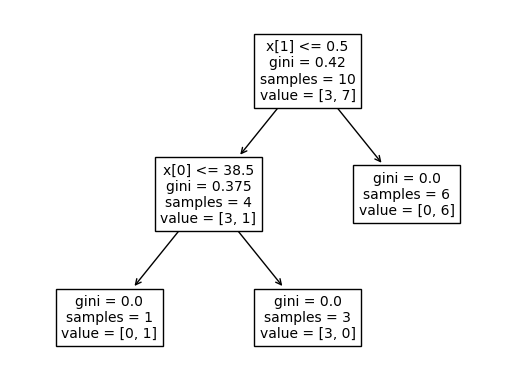

In [28]:
clf3 = DecisionTreeClassifier(max_features="sqrt", random_state=10)
clf3.fit(X[samples[2],:], y[samples[2]])
tree.plot_tree(clf3, fontsize=10);

**AdaBoost**

Classification

In [29]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

data = {'age': [23, 31, 35, 35, 42, 43, 45, 46, 46, 51], 
        'likes goats': [0, 1, 0, 0, 0, 1, 1, 1, 0, 1], 
        'likes height': [0, 1, 1, 0, 0, 1, 0, 1, 1, 1], 
        'go rock climbing': [0, 1, 1, 0, 0, 1, 0, 1, 0, 1]}

df = pd.DataFrame(data)
df

,age,likes goats,likes height,go rock climbing
0,23,0,0,0
1,31,1,1,1
2,35,0,1,1
3,35,0,0,0
4,42,0,0,0
5,43,1,1,1
6,45,1,0,0
7,46,1,1,1
8,46,0,1,0
9,51,1,1,1


In [34]:
X = df[['age', 'likes goats', 'likes height']].values
y = df[['go rock climbing']].values.reshape(-1,)

In [35]:
clf = AdaBoostClassifier(n_estimators=3, random_state=42, algorithm="SAMME")
clf.fit(X, y)

AdaBoostClassifier(algorithm='SAMME', n_estimators=3, random_state=42)

In [36]:
y_hat = clf.predict(X)
y_hat_proba = clf.predict_proba(X)
print(f"predictions: {y_hat}")
print(f"predictions probs: {y_hat_proba[:,1]}")
print(f"score: {clf.score(X, y)}") # mean accuracy

predictions: [0 1 1 0 0 1 0 1 0 1]
predictions probs: [0.39307968 0.73105858 0.57506809 0.39307968 0.39307968 0.73105858
 0.42493191 0.60692032 0.43461279 0.60692032]
score: 1.0


In [37]:
staged_predictions = [p for p in clf.staged_predict(X)]
staged_predictions

[array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1]),
 array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1]),
 array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1])]

In [38]:
staged_score = [p for p in clf.staged_score(X, y)]
staged_score

[0.9, 0.9, 1.0]

In [39]:
clf.estimator_weights_

array([2.19722458, 2.07944154, 1.68639895])

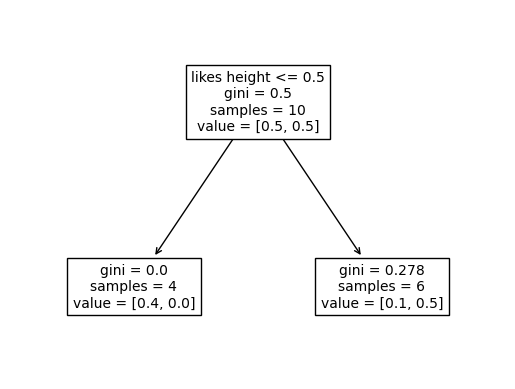

In [40]:
from sklearn import tree
tree.plot_tree(clf.estimators_[0], 
               feature_names=['age', 'likes goats', 'likes height'], fontsize=10);

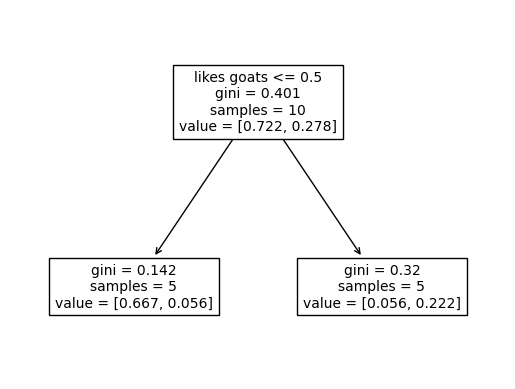

In [41]:
tree.plot_tree(clf.estimators_[1], feature_names=['age', 'likes goats', 'likes height'], fontsize=10);

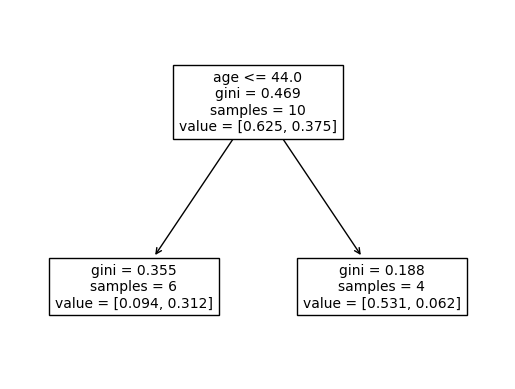

In [42]:
tree.plot_tree(clf.estimators_[2], feature_names=['age', 'likes goats', 'likes height'], fontsize=10);

In [43]:
clf.estimator_errors_

array([0.1       , 0.11111111, 0.15625   ])

In [44]:
clf.estimator_weights_

array([2.19722458, 2.07944154, 1.68639895])

In [45]:
#clf.estimators_[0].get_params()

In [46]:
#clf.estimators_[1].get_params()

In [47]:
#clf.estimators_[2].get_params()

Simulate boosting

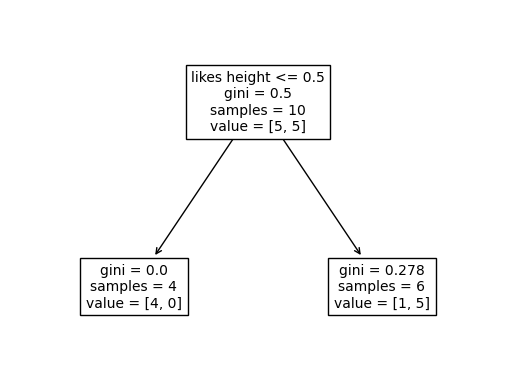

In [48]:
X = df[['age', 'likes goats', 'likes height']].values
y = df[['go rock climbing']].values.reshape(-1,)
dt1 = DecisionTreeClassifier(**clf.estimators_[0].get_params())
dt1.fit(X, y)
tree.plot_tree(dt1, feature_names=['age', 'likes goats', 'likes height'], fontsize=10);

In [49]:
dt1.max_features_

3

In [50]:
w_old = 0.1 # initial weights
err = 0.1 # 1 misclassification after first iteration
alpha = 1/2 *np.log((1-err)/err)
w_p = w_old * np.exp(-alpha)
w_n = w_old * np.exp(alpha)
w_p, w_n

(0.03333333333333333, 0.30000000000000004)

In [51]:
# bootstrapping
weights = [w_p, w_p, w_p, w_p, w_p, w_p, w_p, w_p, w_n, w_p]
weights = weights/np.sum(weights)
print(weights)
idx = []
for i in range(len(df)):
    idx = idx + [np.random.choice(np.arange(0, 10), p=weights)]
idx

[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.5        0.05555556]


[8, 2, 1, 8, 3, 1, 8, 9, 8, 2]

In [52]:
idx = [1, 2, 1, 8, 8, 0, 8, 8, 9, 9]
#data2 = {'age': [46, 23, 31, 46, 46, 43, 35, 46, 46, 43], 
#        'likes goats': [0, 0, 1, 0, 0, 1, 0, 0, 1, 1], 
#        'likes height': [1, 0, 1, 0, 0, 1, 0, 1, 1, 1], 
#        'go rock climbing': [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]}
#df2 = pd.DataFrame(data2)
df2 = df.iloc[idx]
df2

,age,likes goats,likes height,go rock climbing
1,31,1,1,1
2,35,0,1,1
1,31,1,1,1
8,46,0,1,0
8,46,0,1,0
0,23,0,0,0
8,46,0,1,0
8,46,0,1,0
9,51,1,1,1
9,51,1,1,1


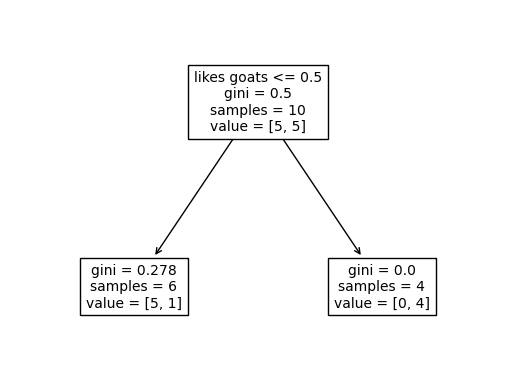

In [53]:
X = df2[['age', 'likes goats', 'likes height']].values
y = df2[['go rock climbing']].values.reshape(-1,)
dt2 = DecisionTreeClassifier(**clf.estimators_[1].get_params())
dt2.fit(X, y)
tree.plot_tree(dt2, feature_names=['age', 'likes goats', 'likes height'], fontsize=10);

In [54]:
w_oldp = 0.05555556 # initial weights
w_oldn = 0.5
# only the second sample was misclassified
weights_old = np.array([w_oldp, w_oldp, w_oldp, w_oldn, w_oldn, w_oldp, w_oldn, w_oldn, w_oldp, w_oldp])
print(weights_old)
err = 0.1 # 1 misclassification after first iteration
alpha = 1/2 *np.log((1-err)/err)
print(alpha)
w_p = np.exp(-alpha)
w_n = np.exp(alpha)
# only the second sample was misclassified
weights = weights_old * np.array([w_p, w_n, w_p, w_p, w_p, w_p, w_p, w_p, w_p, w_p])
print(weights)
weights = weights/np.sum(weights)
print(weights)

[0.05555556 0.05555556 0.05555556 0.5        0.5        0.05555556
 0.5        0.5        0.05555556 0.05555556]
1.0986122886681098
[0.01851852 0.16666668 0.01851852 0.16666667 0.16666667 0.01851852
 0.16666667 0.16666667 0.01851852 0.01851852]
[0.02       0.18000001 0.02       0.18       0.18       0.02
 0.18       0.18       0.02       0.02      ]


In [55]:
weights[0]+weights[1]+weights[2]+weights[3]+weights[4]+weights[5]+weights[6]+weights[7]

0.959999997696

In [56]:
# bootstrapping
idx = []
for i in range(len(df)):
    idx = idx + [np.random.choice(np.arange(0, 10), p=weights)]
idx

[1, 3, 4, 4, 1, 1, 6, 8, 3, 7]

In [57]:
#idx = [1, 6, 1, 3, 3, 7, 3, 7, 7, 6]
idx = [4, 4, 1, 4, 9, 7, 7, 1, 3, 1]
#idx = [6, 2, 1, 5, 4, 5, 2, 6, 6, 2]
df3 = df2.iloc[idx]
df3

,age,likes goats,likes height,go rock climbing
8,46,0,1,0
8,46,0,1,0
2,35,0,1,1
8,46,0,1,0
9,51,1,1,1
8,46,0,1,0
8,46,0,1,0
2,35,0,1,1
8,46,0,1,0
2,35,0,1,1


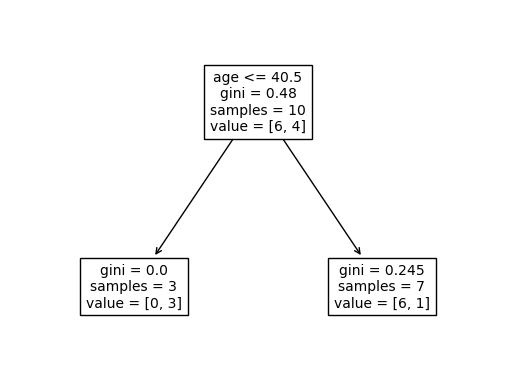

In [58]:
X = df3[['age', 'likes goats', 'likes height']].values
y = df3[['go rock climbing']].values.reshape(-1,)
dt3 = DecisionTreeClassifier(**clf.estimators_[2].get_params())
dt3.fit(X, y)
tree.plot_tree(dt3, feature_names=['age', 'likes goats', 'likes height'], fontsize=10);

Regression

In [59]:
import pandas as pd

data = {'age': [23, 31, 35, 35, 42, 43, 45, 46, 46, 51], 
        'likes goats': [0, 1, 0, 0, 0, 1, 1, 1, 0, 1], 
        'likes height': [0, 1, 1, 0, 0, 1, 0, 1, 1, 1], 
        'climbed meters': [200, 700, 600, 300, 200, 700, 300, 700, 600, 700]}

df = pd.DataFrame(data)
df

,age,likes goats,likes height,climbed meters
0,23,0,0,200
1,31,1,1,700
2,35,0,1,600
3,35,0,0,300
4,42,0,0,200
5,43,1,1,700
6,45,1,0,300
7,46,1,1,700
8,46,0,1,600
9,51,1,1,700


In [60]:
from sklearn.ensemble import AdaBoostRegressor

X = df[['age', 'likes goats', 'likes height']].values
y = df[['climbed meters']].values.reshape(-1,)
reg = AdaBoostRegressor(n_estimators=3, random_state=42)
reg.fit(X, y)

AdaBoostRegressor(n_estimators=3, random_state=42)

In [61]:
y_hat = reg.predict(X)
print(f"predictions: {y_hat}")
print(f"score: {reg.score(X, y)}") # mean accuracy

predictions: [250. 700. 600. 300. 200. 700. 300. 700. 700. 700.]
score: 0.9715909090909091


In [62]:
staged_predictions = [p for p in reg.staged_predict(X)]
staged_predictions

[array([250., 700., 700., 250., 200., 700., 300., 700., 700., 700.]),
 array([300., 700., 600., 300., 200., 700., 300., 700., 600., 700.]),
 array([250., 700., 600., 300., 200., 700., 300., 700., 700., 700.])]

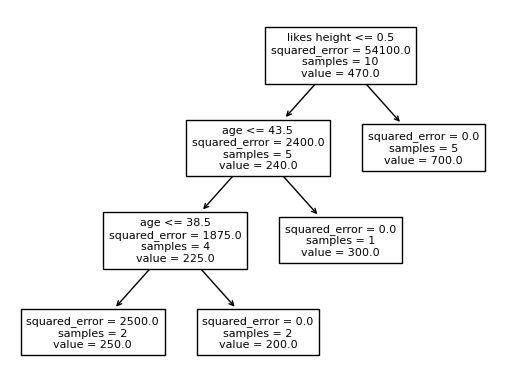

In [63]:
from sklearn import tree

tree.plot_tree(reg.estimators_[0], feature_names=['age', 'likes goats', 'likes height'], fontsize=8);

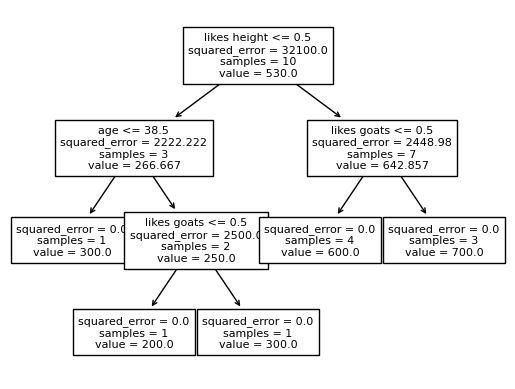

In [64]:
tree.plot_tree(reg.estimators_[1], feature_names=['age', 'likes goats', 'likes height'], fontsize=8);

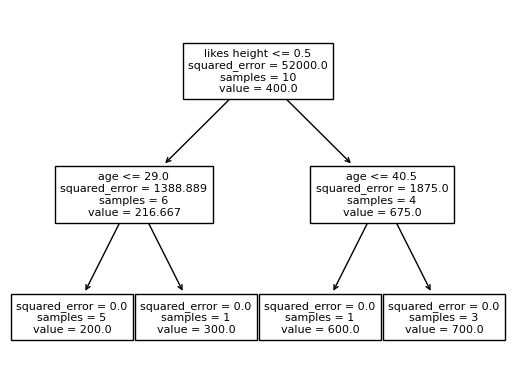

In [65]:
tree.plot_tree(reg.estimators_[2], feature_names=['age', 'likes goats', 'likes height'], fontsize=8);

In [66]:
reg.estimator_weights_

array([0.84729786, 2.07731083, 1.53214395])

In [67]:
(reg.estimator_weights_[0]*300+reg.estimator_weights_[1]*300+reg.estimator_weights_[2]*300)/(reg.estimator_weights_[0]+reg.estimator_weights_[1]+reg.estimator_weights_[2])

299.99999999999994

In [68]:
reg.estimators_[0].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1608637542,
 'splitter': 'best'}

Simulate boosting

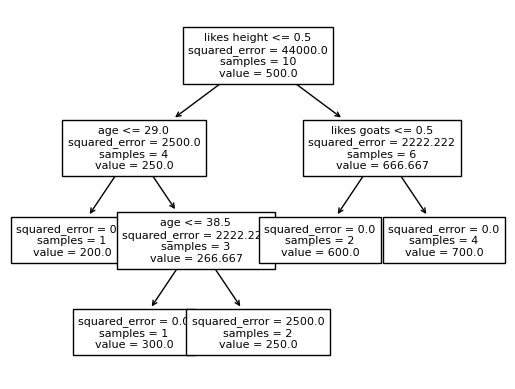

In [69]:
X = df[['age', 'likes goats', 'likes height']].values
y = df[['climbed meters']].values.reshape(-1,)
dt1 = DecisionTreeRegressor(**reg.estimators_[0].get_params())
dt1.fit(X, y)
tree.plot_tree(dt1, feature_names=['age', 'likes goats', 'likes height'], fontsize=8);

In [70]:
dt1.predict(X)

array([200., 700., 600., 300., 250., 700., 250., 700., 600., 700.])

In [71]:
w_old = 0.1 # initial weights
err = 0.2 # 1 misclassification after first iteration
alpha = 1/2 *np.log((1-err)/err)
w_p = w_old * np.exp(-alpha)
w_n = w_old * np.exp(alpha)
alpha, w_p, w_n

(0.6931471805599453, 0.05, 0.2)

In [72]:
# bootstrapping
weights = [w_p, w_p, w_p, w_n, w_n, w_p, w_p, w_p, w_p, w_p]
weights = weights/np.sum(weights)
print(weights)
idx = []
for i in range(len(df)):
    idx = idx + [np.random.choice(np.arange(0, 10), p=weights)]
idx

[0.0625 0.0625 0.0625 0.25   0.25   0.0625 0.0625 0.0625 0.0625 0.0625]


[6, 3, 1, 0, 8, 5, 3, 5, 3, 3]

In [73]:
idx = [3, 6, 3, 3, 4, 4, 5, 0, 1, 3]
df2 = df.iloc[idx]
df2

,age,likes goats,likes height,climbed meters
3,35,0,0,300
6,45,1,0,300
3,35,0,0,300
3,35,0,0,300
4,42,0,0,200
4,42,0,0,200
5,43,1,1,700
0,23,0,0,200
1,31,1,1,700
3,35,0,0,300


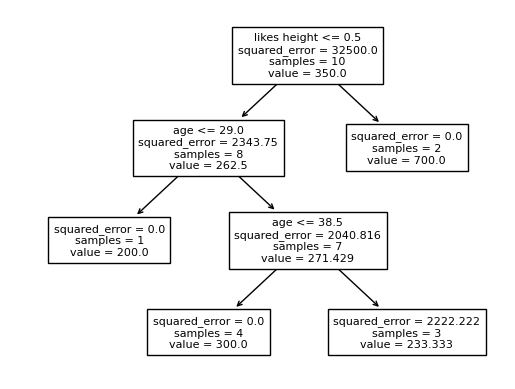

In [74]:
X = df2[['age', 'likes goats', 'likes height']].values
y = df2[['climbed meters']].values.reshape(-1,)
dt2 = DecisionTreeRegressor(**reg.estimators_[1].get_params())
dt2.fit(X, y)
tree.plot_tree(dt2, feature_names=['age', 'likes goats', 'likes height'], fontsize=8);

In [75]:
dt2.predict(X)==y

array([ True, False,  True,  True, False, False,  True,  True,  True,
        True])

In [76]:
dt2.predict(X)

array([300.        , 233.33333333, 300.        , 300.        ,
       233.33333333, 233.33333333, 700.        , 200.        ,
       700.        , 300.        ])

In [77]:
# update weights
w_oldp = 0.0625 # initial weights
w_oldn = 0.25
# only the second sample was misclassified
weights_old = np.array([w_oldp, w_oldp, w_oldp, w_oldp, w_oldn, w_oldn, w_oldp, w_oldp, w_oldp, w_oldp])
print(weights_old)
err = 0.3 # 1 misclassification after first iteration
alpha = 1/2 *np.log((1-err)/err)
print(alpha)
w_p = np.exp(-alpha)
w_n = np.exp(alpha)
# only the second sample was misclassified
weights = weights_old * np.array([w_p, w_n, w_p, w_p, w_p, w_n, w_n, w_p, w_p, w_p])
print(weights)
weights = weights/np.sum(weights)
print(weights)

[0.0625 0.0625 0.0625 0.0625 0.25   0.25   0.0625 0.0625 0.0625 0.0625]
0.42364893019360184
[0.04091585 0.09547033 0.04091585 0.04091585 0.16366342 0.38188131
 0.09547033 0.04091585 0.04091585 0.04091585]
[0.04166667 0.09722222 0.04166667 0.04166667 0.16666667 0.38888889
 0.09722222 0.04166667 0.04166667 0.04166667]


In [78]:
weights[0]+weights[1] + weights[2] + weights[3] +weights[4]+weights[5]+weights[6]+weights[7]+weights[8]+weights[9]

0.9999999999999998

In [79]:
idx = []
for i in range(len(df)):
    idx = idx + [np.random.choice(np.arange(0, 10), p=weights)]
idx

[8, 7, 6, 2, 5, 5, 4, 5, 7, 9]

In [80]:
idx = [5, 1, 9, 6, 5, 4, 5, 4, 7, 4]
df3 = df2.iloc[idx]
df3

,age,likes goats,likes height,climbed meters
4,42,0,0,200
6,45,1,0,300
3,35,0,0,300
5,43,1,1,700
4,42,0,0,200
4,42,0,0,200
4,42,0,0,200
4,42,0,0,200
0,23,0,0,200
4,42,0,0,200


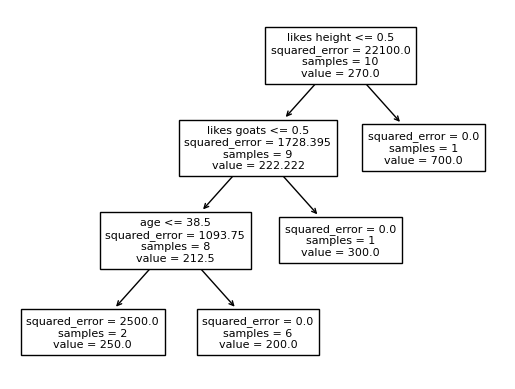

In [81]:
X = df3[['age', 'likes goats', 'likes height']].values
y = df3[['climbed meters']].values.reshape(-1,)
dt3 = DecisionTreeRegressor(**reg.estimators_[2].get_params())
dt3.fit(X, y)
tree.plot_tree(dt3, feature_names=['age', 'likes goats', 'likes height'], fontsize=8);

In [82]:
dt3.predict(X)==y

array([ True,  True, False,  True,  True,  True,  True,  True, False,
        True])

In [83]:
dt3.predict(X)

array([200., 300., 250., 700., 200., 200., 200., 200., 250., 200.])

In [84]:
y

array([200, 300, 300, 700, 200, 200, 200, 200, 200, 200])

**Gradient Boosting**

Regression

In [85]:
import pandas as pd

data = {'age': [23, 31, 35, 35, 42, 43, 45, 46, 46, 51], 
        'likes goats': [0, 1, 0, 0, 0, 1, 1, 1, 0, 1], 
        'likes height': [0, 1, 1, 0, 0, 1, 0, 1, 1, 1], 
        'climbed meters': [200, 700, 600, 300, 200, 700, 300, 700, 600, 700]}

df = pd.DataFrame(data)
df

,age,likes goats,likes height,climbed meters
0,23,0,0,200
1,31,1,1,700
2,35,0,1,600
3,35,0,0,300
4,42,0,0,200
5,43,1,1,700
6,45,1,0,300
7,46,1,1,700
8,46,0,1,600
9,51,1,1,700


In [86]:
from sklearn.ensemble import GradientBoostingRegressor

X = df[['age', 'likes goats', 'likes height']].values
y = df[['climbed meters']].values.reshape(-1,)
reg = GradientBoostingRegressor(
    n_estimators=20, 
    max_depth=3, 
    #learning_rate=1, 
    random_state=42
    )
reg.fit(X, y)

GradientBoostingRegressor(n_estimators=20, random_state=42)

In [87]:
y_pred = reg.predict(X)
score = reg.score(X, y)

In [88]:
print(y_pred) 
print(score)

[246.61867662 675.68466908 587.84233454 313.49422481 249.1343498
 675.68466908 312.32940335 675.68466908 587.84233454 675.68466908]
0.9827678350897152


Example - individual steps calculated based on Decision Trees, with M=2 weak learners (trees with max_depth=3)

In [89]:
def loss(y, y_hat):
    return 0.5*(y - y_hat)**2

first prediction is mean of all targets

In [90]:
y_pred_1 = df["climbed meters"].mean()
print(y_pred_1)

500.0


In [91]:
mean_squared_error(df["climbed meters"], np.repeat(y_pred_1, len(df["climbed meters"])))

44000.0

M = 1, calculate residuals: r_i1 = y_i - y_pred_1i (in this case y_pred_1i = y_pred_1 for all i)

In [92]:
r_1 = df["climbed meters"] - y_pred_1
r_1

0   -300.0
1    200.0
2    100.0
3   -200.0
4   -300.0
5    200.0
6   -200.0
7    200.0
8    100.0
9    200.0
Name: climbed meters, dtype: float64

fit a pruned Decision Tree to the residuals

In [93]:
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X, r_1)

DecisionTreeRegressor(max_depth=3)

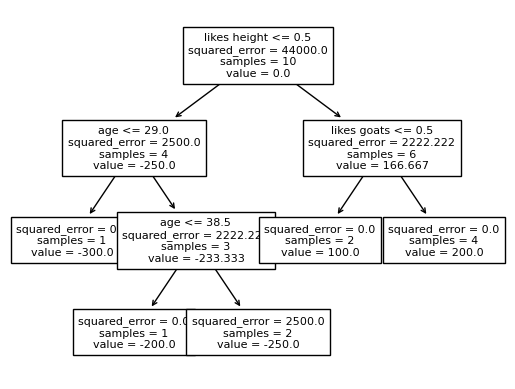

In [94]:
tree.plot_tree(dt, feature_names=['age', 'likes goats', 'likes height'], fontsize=8);

In [95]:
dt_pred_1 = dt.predict(X)
dt_pred_1

array([-300.,  200.,  100., -200., -250.,  200., -250.,  200.,  100.,
        200.])

Update the model

In [96]:
y_pred_2 = y_pred_1 + dt_pred_1
y_pred_2

array([200., 700., 600., 300., 250., 700., 250., 700., 600., 700.])

In [97]:
mean_squared_error(df["climbed meters"], y_pred_2)

500.0

M = 2, calculate residuals: r_i2 = y_i - y_pred_2i

In [98]:
r_2 = df["climbed meters"] - y_pred_2
r_2

0     0.0
1     0.0
2     0.0
3     0.0
4   -50.0
5     0.0
6    50.0
7     0.0
8     0.0
9     0.0
Name: climbed meters, dtype: float64

fit a pruned Decision Tree to the residuals

In [99]:
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X, r_2)

DecisionTreeRegressor(max_depth=3)

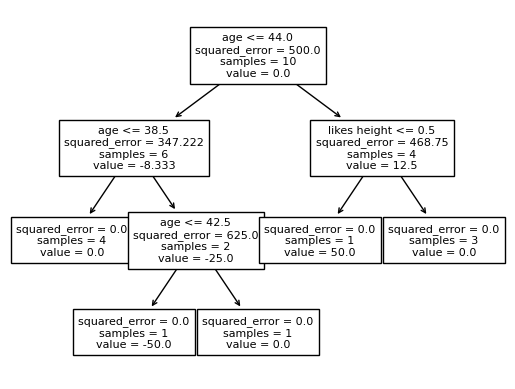

In [100]:
tree.plot_tree(dt, feature_names=['age', 'likes goats', 'likes height'], fontsize=8);

In [101]:
dt_pred_2 = dt.predict(X)
dt_pred_2

array([  0.,   0.,   0.,   0., -50.,   0.,  50.,   0.,   0.,   0.])

Update the model

In [102]:
y_pred_3 = y_pred_2 + dt_pred_2
y_pred_3

array([200., 700., 600., 300., 200., 700., 300., 700., 600., 700.])

In [103]:
mean_squared_error(df["climbed meters"], y_pred_3)

0.0

Classification

In [104]:
import pandas as pd
from sklearn import tree

data = {'age': [23, 31, 35, 35, 42, 43, 45, 46, 46, 51], 
        'likes goats': [0, 1, 0, 0, 0, 1, 1, 1, 0, 1], 
        'likes height': [0, 1, 1, 0, 0, 1, 0, 1, 1, 1], 
        'go rock climbing': [0, 1, 1, 0, 0, 1, 0, 1, 0, 1]}

df = pd.DataFrame(data)
df

,age,likes goats,likes height,go rock climbing
0,23,0,0,0
1,31,1,1,1
2,35,0,1,1
3,35,0,0,0
4,42,0,0,0
5,43,1,1,1
6,45,1,0,0
7,46,1,1,1
8,46,0,1,0
9,51,1,1,1


In [123]:
from sklearn.ensemble import GradientBoostingClassifier

X = df[['age', 'likes goats', 'likes height']].values
y = df[['go rock climbing']].values.reshape(-1,)
clf = GradientBoostingClassifier(
    n_estimators=3, 
    max_depth=2, 
    random_state=42
    )
clf.fit(X, y)

GradientBoostingClassifier(max_depth=2, n_estimators=3, random_state=42)

In [124]:
y_pred = clf.predict(X)
score = clf.score(X, y)

In [125]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [126]:
score

0.9